# Import libraries

In [1]:
import nba_api
import pandas as pd
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
import numpy as np
import matplotlib.pyplot as plt

Configure matplotlib

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 10)
plt.style.use('rose-pine-dawn.mplstyle')

### 1. Charting players rebounds over their careers

Function to get career stats for a player. 

In [8]:
def get_career_stats(player_name: str):
    """ Takes as input a player name and returns the corresponding career stats as a pandas dataframe """
    
    player_id = players.find_players_by_full_name(player_name)[0]['id']

    career = playercareerstats.PlayerCareerStats(player_id).get_data_frames()[0]
    
    return career

In [11]:
from nba_api.stats.static import players

def chart_career_rebounds(player_name: str):
    """ Creates multiple graphs of a player's career reboudns """
    
    # Get player stats
    career = get_career_stats(player_name)
    
    # Get corresponding career stats
    plt.plot(career['SEASON_ID'], career['OREB'], label='OREB')
    plt.plot(career['SEASON_ID'], career['DREB'], label='DREB')
    plt.title(f'{player_name} Rebound Data', fontsize=18)
    plt.xlabel('NBA Season', fontsize=15)
    plt.ylabel('Rebounds', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

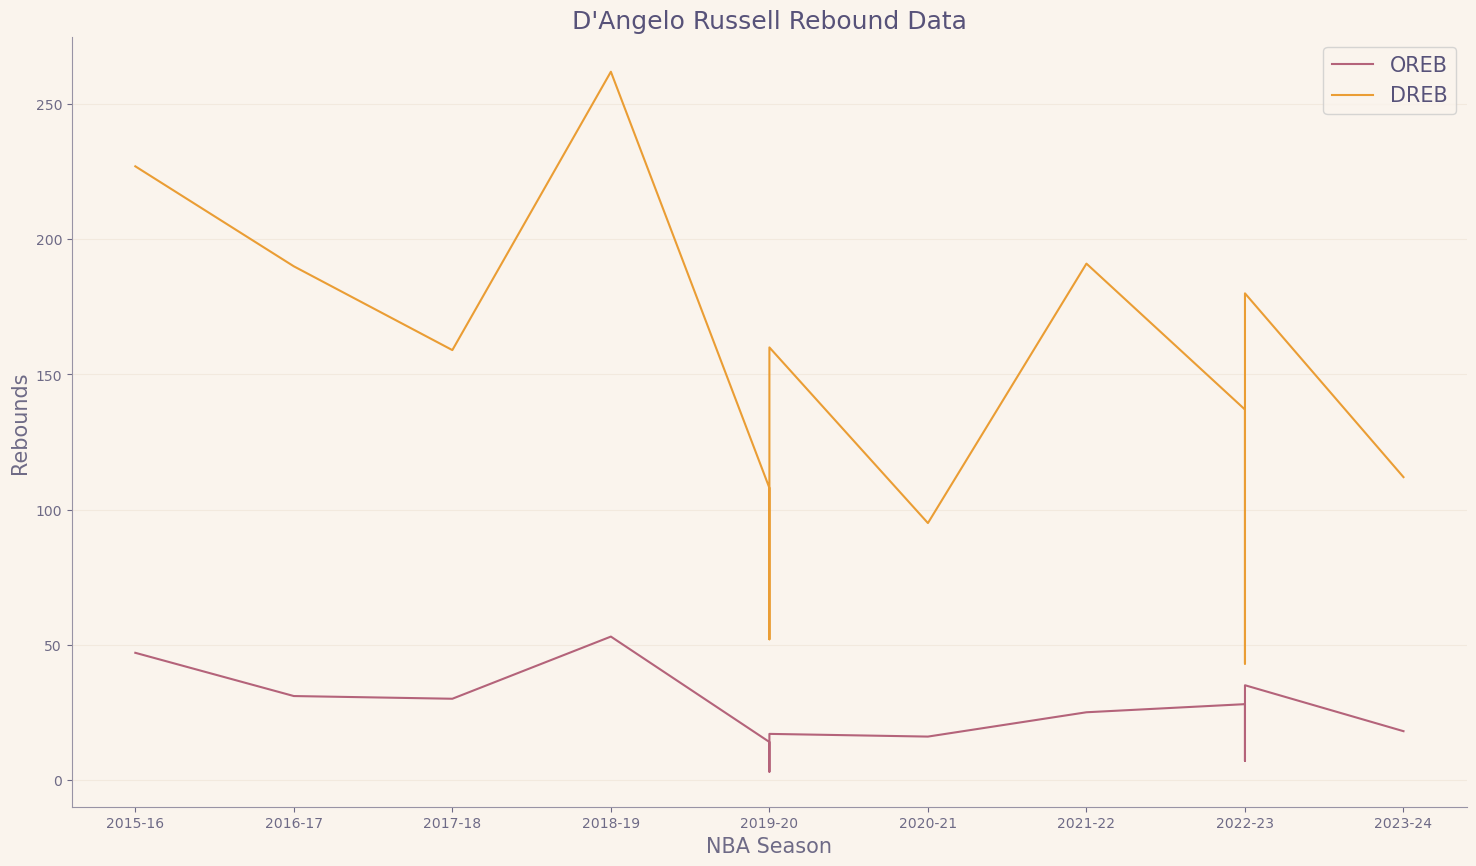

In [13]:
chart_career_rebounds("D'Angelo Russell")

# Teams

In [ ]:
from nba_api.stats.static import teams
teams = teams.get_teams()
teams = pd.DataFrame(teams)
teams

# Scoreboard

In [ ]:
from nba_api.live.nba.endpoints import scoreboard

# Today's Score Board
games = scoreboard.ScoreBoard()

games.get_json()